# SPACEDOS02

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
from skyfield.api import load, EarthSatellite, Time


In [3]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [3]:
#fto = glob.iglob("./data/*.TXT") # generator, search immediate subdirectories 

fto = '/storage/experiments/2020/02_ISS_SPACEDOS/DATALOG.TXT' #  File to Open

print (fto)

l=[]
#l.extend(range(0,261))
#l.extend(range(0,501))
l.extend(range(0,258))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*')#,engine='python' )
#df = pd.read_csv(fto, sep=',', header=None, comment='*')#,engine='python' )
df = df.reset_index(drop=True)

/storage/experiments/2020/02_ISS_SPACEDOS/DATALOG.TXT


/nix/store/hqvzaq1k1bdqz4d0bcgbfylj1aiqq0k9-python3-3.7.6-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#df.loc[df[0]=='$CANDY']
#df
#df.iloc[90:95,:20]
#rc['sum'].plot()
#plt.ylim([0,300])
#rc.loc[rc[257]<=10]
#rc[range(7,255)]
#df
rc['sum']

0          7.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1068064    0.0
1068065    0.0
1068066    0.0
1068067    0.0
1068068    0.0
Name: sum, Length: 1068069, dtype: float64

## Calculate Flux

Text(0, 0.5, 'Flux [counts per 10 s]')

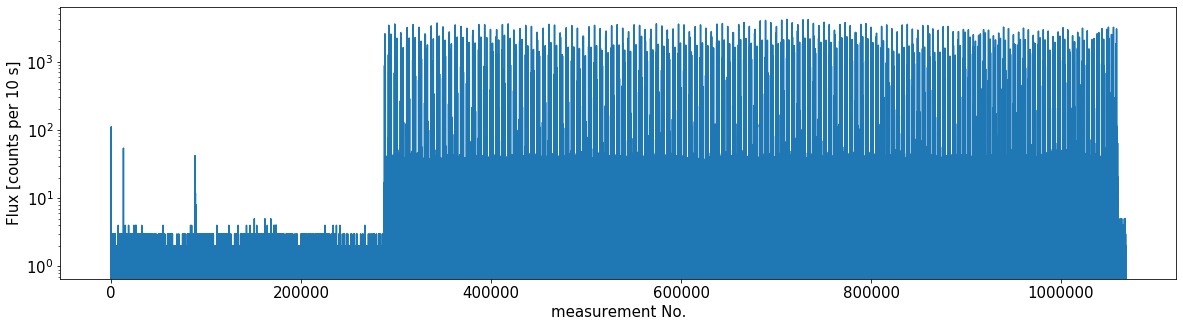

In [5]:
%matplotlib inline

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc.iloc[:,11:255].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

rc['sum'].plot()
plt.yscale('log')

plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')
#plt.xlim([287000,289000])
#plt.ylim([0,4000])


In [69]:
#xf = rc.iloc[287429:1060000]
#xf = df.iloc[287429:380000]
xf = df.iloc[400000:500000]
xf.to_csv('iss.csv')

Text(0, 0.5, 'Flux [cm$^-$$^2$ s$^-$$^1$]')

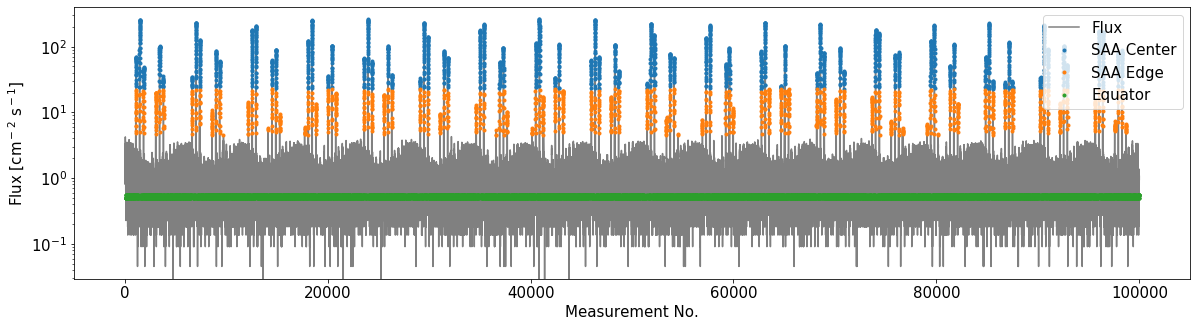

In [46]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

# shift one column left for offset 255
rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rc['sum']/11/2, c='gray', label='Flux')
plt.yscale('log')

ee = 10
per = 6300
e = np.array(range(100))
e[0] = 7020 + 4 * 6300 + 360
e[1] = 450
e[2] = 550
e[3] = e[0] + per
e[4] = e[1] + per
e[5] = e[2] + per
e[6] = e[3] + per
e[7] = e[4] + per
e[8] = e[5] + per

#for i in range(10):
#    rc[e[0] + i * per:e[0] + i * per +100]['sum'].plot(c='red')
plt.plot(rc.loc[(rc['sum']>500) & (rc['sum']<10000)]['sum']/11/2, marker='.', linestyle='', label='SAA Center')
plt.plot(rc.loc[(rc['sum']>100) & (rc['sum']<500)]['sum']/11/2, marker='.', linestyle='', label='SAA Edge')
plt.plot(rc.loc[(rc['sum']>10) & (rc['sum']<13)]['sum']/11/2, marker='.', linestyle='', label='Equator')

plt.legend()

plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim([34500,36000])
#plt.ylim([0,4000])



(array([34400., 34600., 34800., 35000., 35200., 35400., 35600., 35800.]),
 <a list of 8 Text xticklabel objects>)

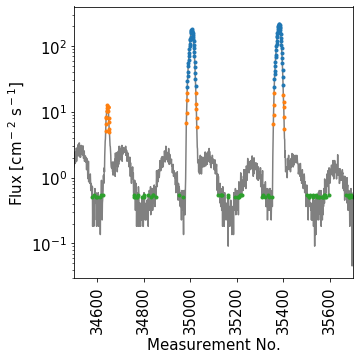

In [50]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

# shift one column left for offset 255
rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(5,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rc['sum']/11/2, c='gray', label='Flux')
plt.yscale('log')

ee = 10
per = 6300
e = np.array(range(100))
e[0] = 7020 + 4 * 6300 + 360
e[1] = 450
e[2] = 550
e[3] = e[0] + per
e[4] = e[1] + per
e[5] = e[2] + per
e[6] = e[3] + per
e[7] = e[4] + per
e[8] = e[5] + per

#for i in range(10):
#    rc[e[0] + i * per:e[0] + i * per +100]['sum'].plot(c='red')
plt.plot(rc.loc[(rc['sum']>500) & (rc['sum']<10000)]['sum']/11/2, marker='.', linestyle='', label='SAA Center')
plt.plot(rc.loc[(rc['sum']>100) & (rc['sum']<500)]['sum']/11/2, marker='.', linestyle='', label='SAA Edge')
plt.plot(rc.loc[(rc['sum']>10) & (rc['sum']<13)]['sum']/11/2, marker='.', linestyle='', label='Equator')

#plt.legend()

plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.xlim([34500,35700])
plt.xticks(rotation=90)
#plt.ylim([0,4000])



## Energy spectrum

1580
1580
1580


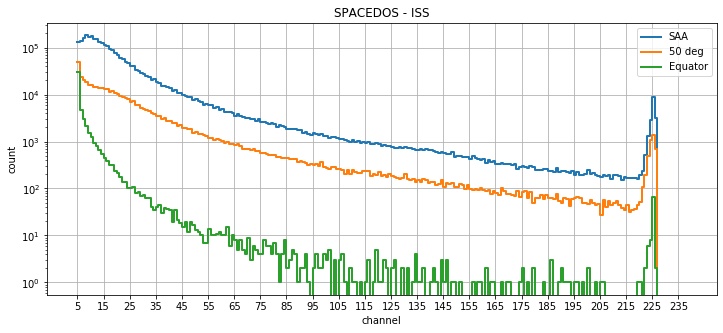

In [52]:
matplotlib.rcParams.update({'font.size': 10})

LOW_ENERGY = 6
HIGH_ENERGY = 240

LENGTH = 1580
rce = rc.loc[(rc['sum']>500) & (rc['sum']<10000)][:LENGTH]
print(len(rce))
ener1 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
rce = rc.loc[(rc['sum']>100) & (rc['sum']<500)][:LENGTH]
print(len(rce))
ener2 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
rce = rc.loc[(rc['sum']>10) & (rc['sum']<15)][:LENGTH]
print(len(rce))
ener3 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]


plt.figure(figsize=(12,5))
plt.yscale('log')

plt.plot(ener1, label='SAA', lw=2, drawstyle='steps-post')
plt.plot(ener2, label='50 deg', lw=2, drawstyle='steps-post')
plt.plot(ener3, label='Equator', lw=2, drawstyle='steps-post')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,240,10))
#plt.xticks(rotation=90)
plt.grid()

0.1 0.038


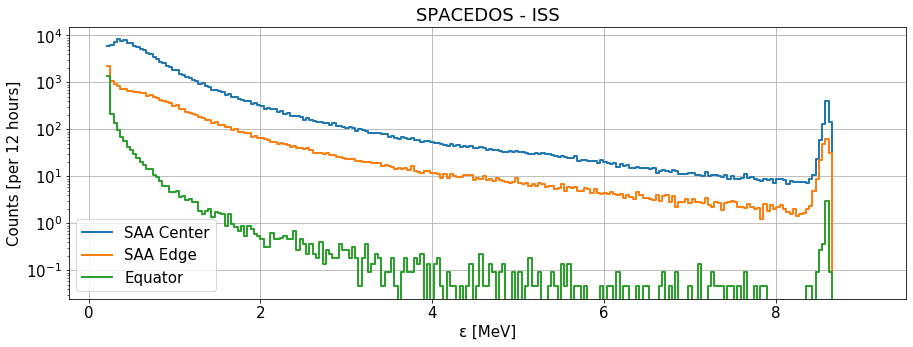

In [53]:
plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-2) * coef[1] + coef[0]

plt.yscale('log')

plt.plot(e['x'], e['1']/11/2 , label='SAA Center', lw=2, drawstyle='steps-post')
#plt.plot(e['x'], e['2'] , label='50 deg', lw=2, drawstyle='steps-post')
plt.plot(e['x'], e['2']/11/2 , label='SAA Edge', lw=2, drawstyle='steps-post')
plt.plot(e['x'], e['3']/11/2 , label='Equator', lw=2, drawstyle='steps-post')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('ε [MeV]')
plt.ylabel(r'Counts [per 12 hours]')
#plt.xticks(rotation=90)
plt.grid()

## Spectrum with plotly

0.1 0.038


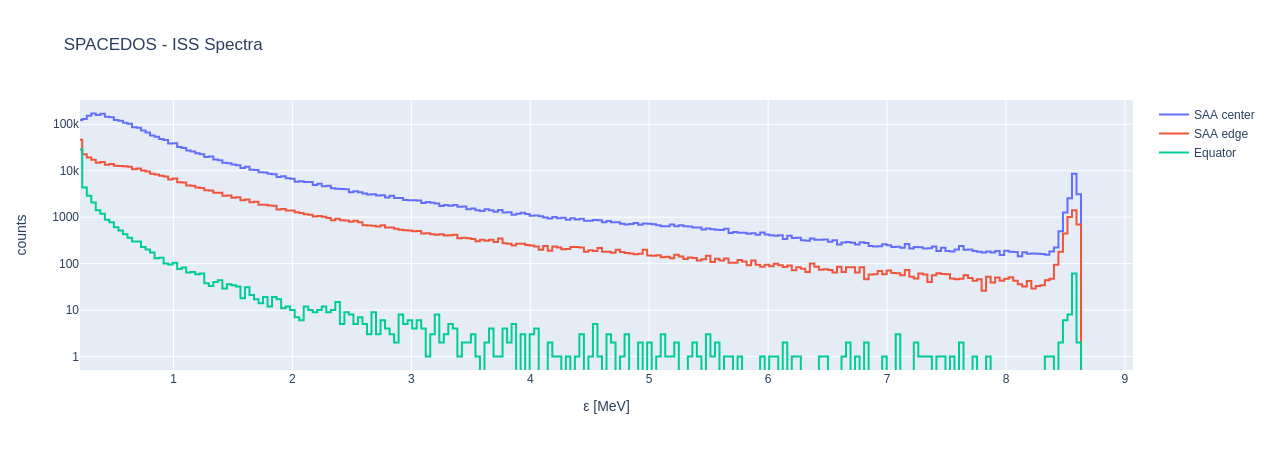

In [42]:
import plotly.graph_objs as go

# Solving following system of linear equations
# 237a + b = 6.12
# 215a + b = 5.49
#tl = 0.5
#l = np.array([[6, 1],[140,1]])
#r = np.array([0.15, 5.14])
#coef = np.linalg.solve(l,r)
#coef[1] = 0.04
#coef[0] = 0.01
print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['index'] = ener1.index
e['x'] = (e['index'].astype(float)-2) * coef[1] + coef[0]

data = [
    go.Scatter(
        x=e['x'],
        y=e['1'],
        name='SAA center',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['2'],
        name='SAA edge',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['3'],
        name='Equator',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    ]
        
layout = go.Layout(
    title='SPACEDOS - ISS Spectra',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='ε [MeV]',
    ),
)

fig = go.Figure(data=data, layout=layout)
fig.show()


Text(0, 0.5, 'Flux [counts per 10 s]')

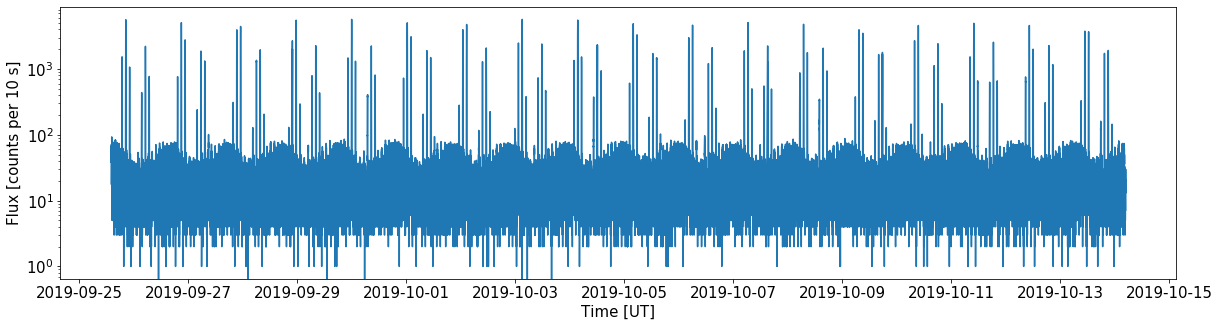

In [84]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#, nrows=1000)#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rcc = rc.copy()

rcc.loc[rcc['257']==255] = rcc.loc[rcc['257']==255].shift(-1,axis=1)
rcc['tim'] = rc['2']

overflow = 0

# count time overflow and sustract time of launch
def helper(a):
    global overflow
    if a < 20:
        overflow += 1
    return a + overflow * 2**21
rcc['timtim'] = rcc['tim'].apply(helper) - 619590#3590147

rcc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:42.701') + pd.to_timedelta(rcc['timtim']*1.06, unit='s'))

rcc = rcc.set_index(['time'])
#rcc = rcc.sort_index()
rcc = rcc['2019-09-25 13:57':]

rcc['sum'] = rcc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rcc['sum'])
#rcc.ix[:,'sum'].plot(c='gray')
plt.yscale('log')
plt.xlabel('Time [UT]')
plt.ylabel('Flux [counts per 10 s]')


Text(0, 0.5, 'Flux [counts per 10 s]')

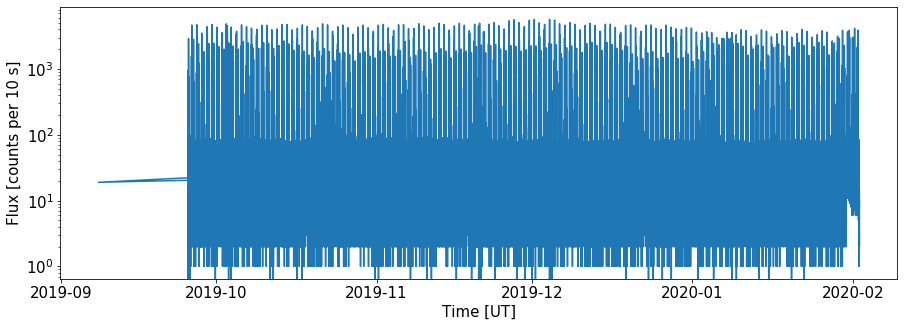

In [85]:
%matplotlib inline

fto = 'iss2.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#, nrows=10000)#,engine='python' )

rcc = rc

rcc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:42.701') + pd.to_timedelta(rcc['timtim']*1, unit='s'))
rcc = rcc.set_index(['time'])
#rcc = rcc.sort_index()

rcc['sum'] = rcc.loc[:,'6':'253'].sum(axis=1)
#rcc['sum'] = rcc['sum'].rolling(60).mean()

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rcc['sum'])
#rcc.ix[:,'sum'].plot(c='gray')
plt.yscale('log')
plt.xlabel('Time [UT]')
plt.ylabel('Flux [counts per 10 s]')


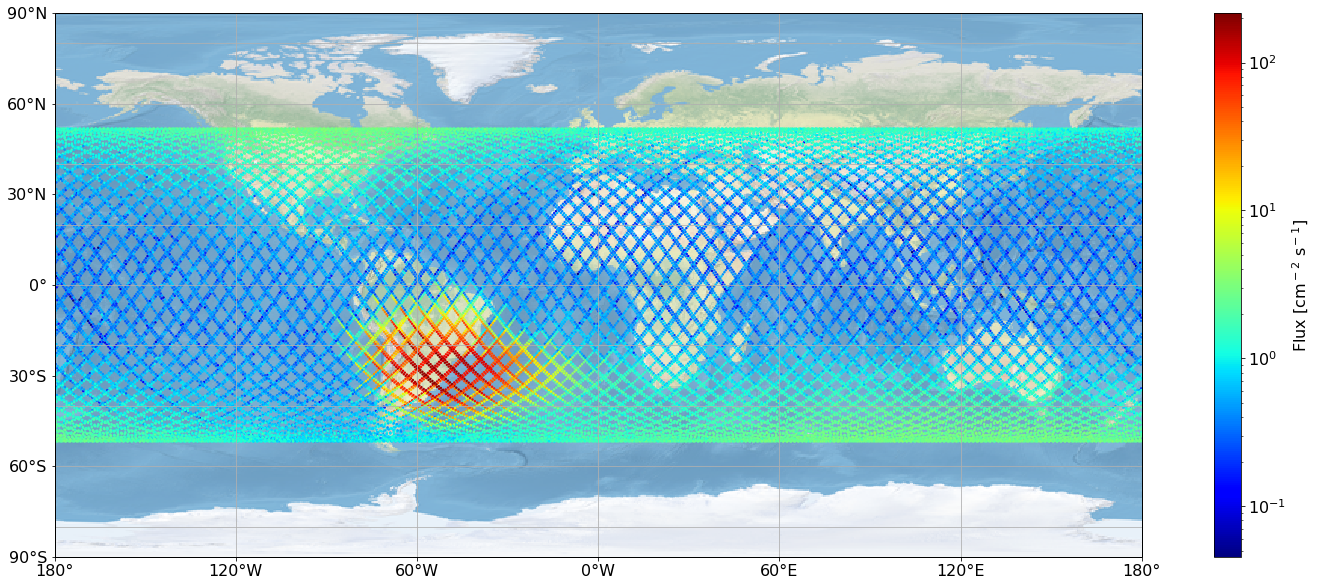

In [59]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs

fto = 'iss2.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*', nrows=50000)
rc.reset_index(drop=True, inplace=True)

#rc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:42.701') + pd.to_timedelta(rc['timtim']*1.03256, unit='s'))
#rc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:40') + pd.to_timedelta(rc['timtim']*1.0048, unit='s'))
rc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:40') + pd.to_timedelta(rc['timtim']*1.0048, unit='s'))
rc = rc.set_index(['time'])

rc.index = rc.index.tz_localize(timezone.utc)
rc = rc.sort_index()


rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

ts = load.timescale(builtin=True)

TLE = """ISS (ZARYA) 
1 25544U 98067A   19268.97576939  .00000347  00000-0  14092-4 0  9995
2 25544  51.6418 221.4194 0007471  85.4554  23.2885 15.50107914190898
"""
name, L1, L2 = TLE.splitlines()

sat = EarthSatellite(L1, L2)

#minutes = np.arange(0, 180, 1) # about two orbits
#times   = ts.utc(2019, 9, 25, 13, minutes)
#fr = pd.to_datetime('2019-09-30').tz_localize('UTC')
#to = pd.to_datetime('2019-11-30').tz_localize('UTC')
#times = ts.utc(rc[fr:to].index)
times = ts.utc(rc.index)


geocentric = sat.at(times)
subsat = geocentric.subpoint()

fig = plt.figure(figsize=(26, 10))
matplotlib.rcParams.update({'font.size': 16})

#plt.tight_layout()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertCylindrical())
ax.gridlines(draw_labels=False)

ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.stock_img()

#sc = plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=6, lw=0, cmap='jet', c=rc[fr:to]['sum']/11/2, norm=matplotlib.colors.LogNorm())
sc = plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=6, lw=0, cmap='jet', c=rc['sum']/11/2, norm=matplotlib.colors.LogNorm())
#plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=10, lw=0, cmap='gist_rainbow', c=rc[fr:to]['sum'])
#plt.tricontour(subsat.longitude.degrees, subsat.latitude.degrees, rc[fr:to]['sum'], 500, linewidths=20, cmap='jet')
cb = plt.colorbar(sc)
cb.set_label(r'Flux [cm$^-$$^2$ s$^-$$^1$]')

Text(0, 0.5, 'Flux [counts per 10 s]')

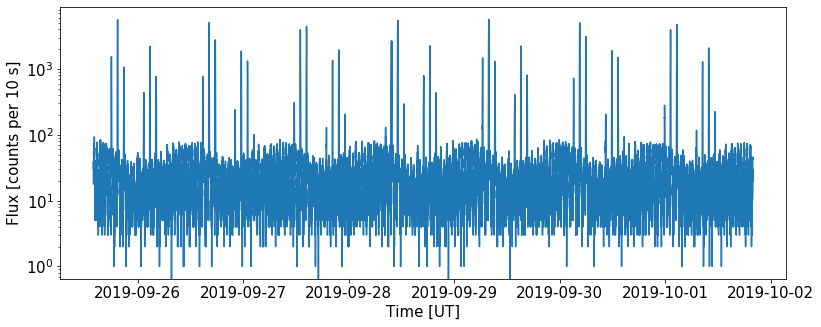

In [86]:
%matplotlib inline

fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*', nrows=40000)

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:42.701') + pd.to_timedelta(rc.index*13.5, unit='s'))
rc = rc.set_index(['time'])
rc.index = rc.index.tz_localize(timezone.utc)

rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(13,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rc['sum'])
#rcc.ix[:,'sum'].plot(c='gray')
plt.yscale('log')
plt.xlabel('Time [UT]')
plt.ylabel('Flux [counts per 10 s]')


In [204]:
e['x'] = (e['index'].astype(float)+5) * coef[0] + coef[1]
e

,1,2,3,index,x
5,124035.0,46360.0,28618.0,5,-1.96
6,129686.0,22555.0,4365.0,6,-2.16
7,153263.0,19211.0,2902.0,7,-2.36
8,170698.0,17338.0,2058.0,8,-2.56
9,158804.0,14843.0,1401.0,9,-2.76
...,...,...,...,...,...
234,0.0,0.0,0.0,234,-47.76
235,0.0,0.0,0.0,235,-47.96
236,0.0,0.0,0.0,236,-48.16
237,0.0,0.0,0.0,237,-48.36


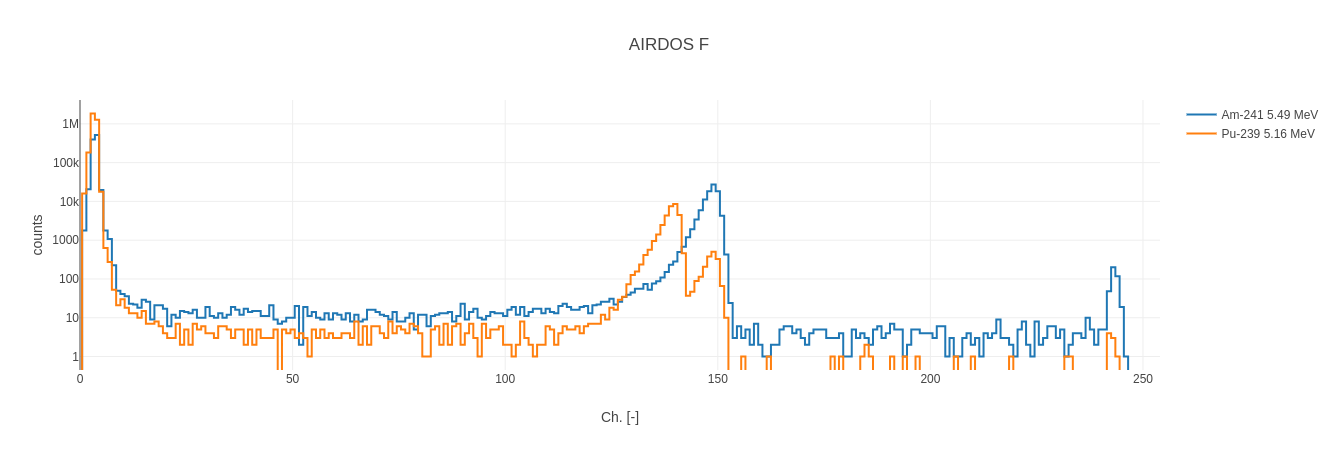

In [38]:
import plotly.plotly as py
import plotly.graph_objs as go

#plt.plot(ener1, label='Am-241 5.49 MeV (85 %) / 5.44 MeV (13 %)', drawstyle='steps-pre')
#plt.plot(ener2, label='Pu-239 5.16 MeV (73 %) / 5.14 (15 %) / 5.11 (12 %)', drawstyle='steps-pre')

data = [
    go.Scatter(
        x=ener1.index,
        y=ener1,
        name='Am-241 5.49 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener2,
        name='Pu-239 5.16 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    ]

layout = go.Layout(
    title='AIRDOS F',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='Ch. [-]',
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='ble')

<IPython.core.display.Javascript object>


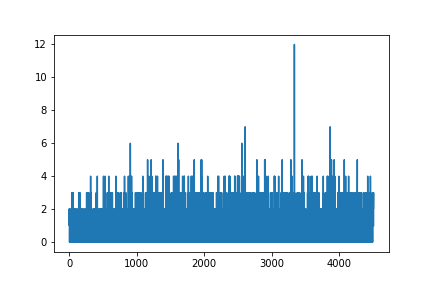

In [10]:
rc[256].plot()

In [53]:
pat = [3,1,2,1,3]
rc.loc[rc[3].eq(pat[0]) & rc[3].shift(-1).eq(pat[1]) & \
       rc[3].shift(-2).eq(pat[2]) & rc[3].shift(-3).eq(pat[3]) &\
       rc[3].shift(-4).eq(pat[4]) & rc[3].shift(-5).eq(pat[4])]

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,sum
2011,NaN,16297,198518,3,25814,121,256,3940,14517,1608,...,0,0,0,0,0,0,0,0,0,121
3154,NaN,17440,213121,3,25813,105,256,4093,14539,1450,...,0,0,0,0,0,0,0,0,0,105
